# **Predicting Stress Level By Training a Multilayer Perceptron**

This machine learning project aims to predict the stress level being experienced by an individual given their sleep health and various lifestyle habits. The project uses a Multilayer Perceptron (MLP) as the machine learning algorithm. [Sleep Health Data](https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampledt) is the dataset used for the project, and is acquired from Kaggle. 

This is a course requirement for CS 180 (Artificial Intelligence) Course of the Department of Computer Science, College of Engineering, University of the Philippines, Diliman under the guidance of Carlo Raquel for A.Y. 2023-2024.

- MAXIMO, Calvin James T.
- MENDOZA, Janelle M.
- MURILLO, Joana Marie V.

The GitHub repository for this project can be accessed [here](https://github.com/cjmax34/cs180-project).

## 1. Importing Libraries

First, we have to import the libraries needed for the project. The libraries imported here are for loading the dataset, and performing exploratory data analysis (EDA). Additional libraries for modeling, and metrics will be imported later in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

Next, we will now load the dataset and store it in a variable named `dataset`.

In [2]:
dataset = pd.read_csv('Sleep_Data_Sampled.csv')

## 3. Performing Exploratory Data Analysis (EDA)

Now we will perform EDA on our dataset. This is important to help us understand the dataset more before we make assumptions. There might be patterns, trends, and relationships in the dataset that may not be visible at first glance. There might also be rows that contain missing values, outliers, inconsistencies, or biases, which could lead to inaccurate results. By gaining a deeper understanding of the dataset at hand through performing EDA, we are able to choose the appropriate techniques and approaches in training the model.

### Data Exploration

#### Shape of dataset

We want to know the shape of the dataset, or the number of rows and columns it has. We can easily do this by calling `shape()` on `dataset`. 

In [3]:
# Prints (# of rows, # of columns)
dataset.shape

(15000, 13)

Our dataset has 15000 rows (!!) and 13 columns/features.

#### Getting information about the dataset

We want more information about the dataset. We can do this by calling `info()` on `dataset`. This provides us essential information such as the number of columns, column names, and data types of each column.

In [4]:
# Provides information about the dataset
dataset.info(); 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB


In [5]:
# Print column names of dataset
dataset.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

We can see that there are 13 columns in total, namely: Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder. 

The data types across all columns are float, int, and object (string).

#### Unique values per column

In this part, we want to identify the unique values for each of the dataset's columns/features. This helps us ensure the consistent formatting of the values across all columms and assess the complexity of each categorical feature (number of unique values).

In [10]:
# Number of unique values per column
dataset.nunique()

Person ID                  15000
Gender                         2
Age                           33
Occupation                    11
Sleep Duration                55
Quality of Sleep               6
Physical Activity Level       37
Stress Level                   6
BMI Category                   4
Blood Pressure                25
Heart Rate                    22
Daily Steps                   80
Sleep Disorder                 3
dtype: int64

The number of unique Person IDs is 15000, which makes sense because it is used to identify an individual in the dataset. We will deal with this later.

In [18]:
# Unique values per categorical feature
for col in dataset.select_dtypes(include='object').columns:
    print(f"{col}: {list(dataset[col].unique())}")

Gender: ['Male', 'Female']
Occupation: ['Doctor', 'Teacher', 'Software Engineer', 'Lawyer', 'Engineer', 'Accountant', 'Nurse', 'Scientist', 'Manager', 'Salesperson', 'Sales Representative']
BMI Category: ['Normal Weight', 'Normal', 'Overweight', 'Obese']
Blood Pressure: ['120/80', '135/90', '126/83', '125/80', '130/85', '140/95', '115/75', '122/80', '118/76', '128/85', '128/84', '119/77', '125/82', '118/75', '115/78', '121/79', '117/76', '140/90', '135/88', '129/84', '130/86', '139/91', '132/87', '131/86', '142/92']
Sleep Disorder: ['Healthy', 'Sleep Apnea', 'Insomnia']


From the output above, it seems that the formatting of each column/feature's values is consistent. However, we have to preprocess some of the values, such as "Male" and "Female" in the Gender category, "Normal Weight" in the BMI Category feature, and the systolic and diastolic blood pressure measurements in the Blood Pressure category. We will delve into this later on.

#### Statistical summary

The `describe()` method returns a statistical summary of the numerical features in the given dataset. For each column, it returns these information.

count - The number of not-empty values.\
mean - The average (mean) value.\
std - The standard deviation.\
min - the minimum value.\
25% - The 25% percentile.\
50% - The 50% percentile.\
75% - The 75% percentile.\
max - the maximum value.

Reference: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [6]:
dataset.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,44.130667,6.997327,7.131267,59.925000,5.654800,70.857533,6795.080000
std,4330.271354,6.840091,0.615187,1.053111,16.814374,1.393568,3.614836,1329.706484
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,3750.750000,40.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,7500.500000,44.000000,7.000000,7.000000,60.000000,6.000000,70.000000,6500.000000
75%,11250.250000,48.000000,7.450000,8.000000,75.000000,6.000000,72.000000,7600.000000
max,15000.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


We can see from the table above that all numerical features have the same count (15000).

The average age is 44.13 years. The average sleep duration is 7 hours. The average quality of sleep (1-10, 1 being the lowest and 10 being the highest) is 7.13. The average amount of daily physical activity is 59.93 minutes, or nearly an hour. The average stress level (1-10, 1 being the lowest and 10 being the highest) is 5.65. The average heart rate is 70.86 beats per minute. The average number of daily steps is 6795.

#### Checking for the presence of null values

An important part of data exploration is checking for the presence of null values in the dataset. It is vital to handle null values because they can produce inaccurate or misleading results. Some machine learning algorithms, especially MLP, also cannot handle null values. Ultimately, it helps us in deciding the best way to handle the null values through various methods such as imputation and removal of rows.

In [7]:
# Checking for null values
dataset.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Fortunately, there are no null values across **ALL** rows of the dataset.

### Data Visualization

Data visualization is another important part of every machine learning project. In this part, we will be using graphs to better understand the patterns and trends in the data. These patterns and trends can easily be understood through visualization especially if they are hard to discern from the raw data. It condenses quite complex information into an easily digestible format. We can also discover what features correlate strongly with the target variable (stress level). Ultimately, it is a powerful tool for effectively communicating insights on data to a wider audience.

#### Distribution of stress level

We want to visualize the distribution of the stress level feature, which is our target variable, in our dataset. The code block below is from [Tanaya Tipre's project](https://www.kaggle.com/code/tanayatipre/stress-level-detection#5.-Data-Visualization).

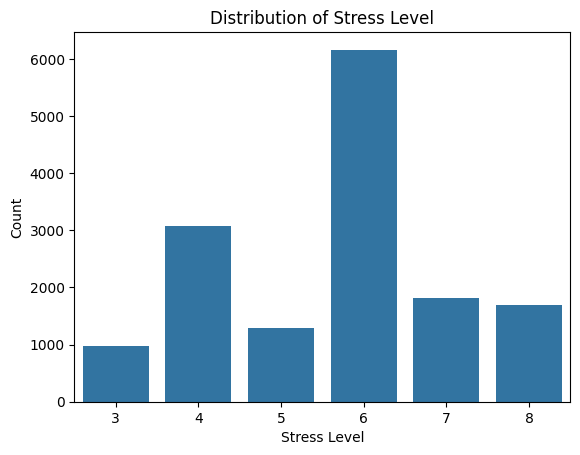

In [19]:
# Distribution of stress level
sns.countplot(x='Stress Level', data=dataset)

plt.xlabel('Stress Level')

plt.ylabel('Count')

plt.title('Distribution of Stress Level')

# Displaying the plot
plt.show()